**NAME**: Raymond Shum

**CLASS**: CST383-30_SP22

**ASSIGNMENT**: W4, Lab 4 - Preprocessing

**DUE DATE**: Feb. 1, 2022

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the very useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('notebook')   
# sns.set_context('paper')  # smaller
# sns.set_context('talk')   # larger

# change default plot size
rcParams['figure.figsize'] = 9,7

Read the red wine data, which measures physical characteristics of wine, and whether people like the taste of the wine.  Note the use of the ‘sep’ parameter in read_csv().

In [3]:
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

Make a small version of the data set named 'df' by selecting 20 random rows of it.  Use the small version until instructed otherwise.

In [6]:
df = wine.sample(20)
df.reset_index(inplace=True)

Scale the data using Z score normalization.

In [7]:
df=df.apply(zscore)

In the scaled data, find the column minimums (a vector containing the minimum value for each column).

In [10]:
df.describe().loc['min']

index                  -1.619573
fixed acidity          -1.165481
volatile acidity       -2.104188
citric acid            -1.479333
residual sugar         -1.080106
chlorides              -2.021832
free sulfur dioxide    -1.276706
total sulfur dioxide   -1.515454
density                -1.276176
pH                     -2.296830
sulphates              -2.062352
alcohol                -1.546016
quality                -2.549510
Name: min, dtype: float64

Repeat, but for the column maximums.  Did you get the kinds of values you expected?

In [11]:
df.describe().loc['max']

index                   1.699701
fixed acidity           2.559544
volatile acidity        1.753818
citric acid             2.116836
residual sugar          3.948958
chlorides               2.778200
free sulfur dioxide     2.403887
total sulfur dioxide    2.199404
density                 2.727715
pH                      1.763864
sulphates               2.212773
alcohol                 1.660535
quality                 1.372813
Name: max, dtype: float64

Scale the data again using unit-interval normalization.  Scale the original small data set, not the version you just normalized.

In [12]:
def scale(x):
    return(x - x.min())/(x.max() - x.min())

df = df.apply(scale)

Again, find the column mins and maxes.  Did you get what you expected?

In [18]:
pd.DataFrame(data={'min':df.apply(np.min),'max':df.apply(np.max)})

,min,max
index,0.0,1.0
fixed acidity,0.0,1.0
volatile acidity,0.0,1.0
citric acid,0.0,1.0
residual sugar,0.0,1.0
chlorides,0.0,1.0
free sulfur dioxide,0.0,1.0
total sulfur dioxide,0.0,1.0
density,0.0,1.0
pH,0.0,1.0


Now we’ll return to the full data set.  Use 'df = wine' to assign 'wine' to variable 'df', then compute the correlation coefficient for  Use function pandas.dataframe.corr(r) to see how the features are correlated.

<AxesSubplot:>

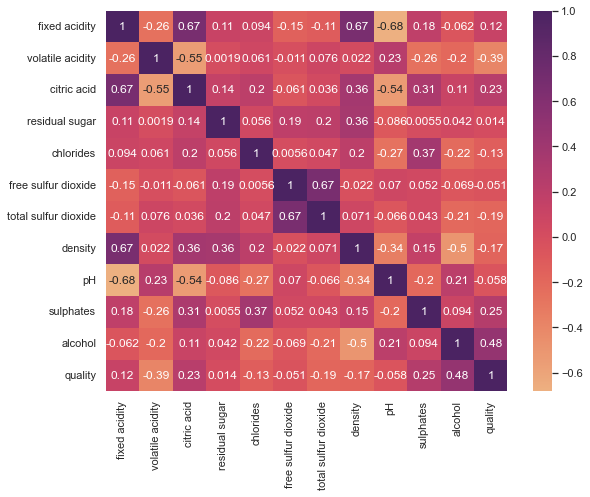

In [67]:
df = wine
sns.heatmap(df.corr(), cmap=sns.color_palette("flare", as_cmap=True), annot=True)

Looking at the matrix of correlations, which features are the most positively correlated?  (Don't consider the correlation between a feature and itself.)  Which are the most negatively correlated?

In [79]:
# index 1 is the feature's correlation with itself
max = df.corr().apply(lambda x: x.sort_values(ascending=False).index[1])
max

fixed acidity                    citric acid
volatile acidity                          pH
citric acid                    fixed acidity
residual sugar                       density
chlorides                          sulphates
free sulfur dioxide     total sulfur dioxide
total sulfur dioxide     free sulfur dioxide
density                        fixed acidity
pH                          volatile acidity
sulphates                          chlorides
alcohol                              quality
quality                              alcohol
dtype: object

In [80]:
min = df.corr().apply(lambda x: x.sort_values().index[0])
min

fixed acidity                         pH
volatile acidity             citric acid
citric acid             volatile acidity
residual sugar                        pH
chlorides                             pH
free sulfur dioxide        fixed acidity
total sulfur dioxide             alcohol
density                          alcohol
pH                         fixed acidity
sulphates               volatile acidity
alcohol                          density
quality                 volatile acidity
dtype: object

Display the correlations with a plot, and answer the questions of the previous problem again.

In [78]:
# See above heatmap

Which features are most correlated to the ‘quality’ variable?  Express what you find in plain English?

In [ ]:
# Positive: alcohol, negative: volatile acidity

Is the wine data tidy?

In [84]:
# It seems that each row conceptually represents one observation

1. Generate some fake GPA data using the following code:

In [86]:
n=10   # number of students
sem_years = np.array([s+' '+str(y) for y in np.arange(14,19) for s in ['spring', 'fall']])
gpa = np.random.normal(loc=3, scale=0.5, size=(n,sem_years.size))
gpa = np.clip(gpa, 0, 4)
gpa = pd.DataFrame(gpa, columns=sem_years)
otter_ids = pd.DataFrame({'otter_id': np.random.randint(1000, 10000, n)})
gpa_by_semester = pd.concat([otter_ids, gpa], axis=1)

Convert the data into the long format.  Change the column names appropriately.

In [92]:
gpa_by_semester.head()

,otter_id,spring 14,fall 14,spring 15,fall 15,spring 16,fall 16,spring 17,fall 17,spring 18,fall 18
0,4229,2.702865,3.143091,2.773878,2.701244,3.373293,2.297867,3.916387,2.357985,2.871663,2.681754
1,3423,3.129537,2.961680,2.623543,2.388781,3.219489,2.789931,3.387732,2.644710,4.000000,3.396580
2,7898,3.346868,2.762888,2.662914,3.300556,3.164420,2.603380,3.413967,2.655152,3.677816,3.382177
3,6269,3.068024,3.102092,2.617287,3.003168,3.433165,2.671048,3.162435,3.437500,4.000000,3.611123
4,2602,2.822576,2.938134,3.787274,3.107261,2.328352,2.514383,2.466945,3.606024,2.810077,2.613412


In [103]:
long = pd.melt(gpa_by_semester, id_vars=['otter_id'], value_vars=sem_years, var_name='sem_year', value_name='gpa')
long

,otter_id,sem_year,gpa
0,4229,spring 14,2.702865
1,3423,spring 14,3.129537
2,7898,spring 14,3.346868
3,6269,spring 14,3.068024
4,2602,spring 14,2.822576
...,...,...,...
95,5809,fall 18,1.953284
96,8534,fall 18,2.838997
97,9348,fall 18,3.467202
98,6397,fall 18,3.604021


If you still have time, sort the data frame by otter ID, then by semester (with ‘spring18’ before ‘fall18’ before ‘spring19’, etc.).  This is not a trivial problem.

In [140]:
long['sem_year'] = pd.Categorical(long['sem_year'],categories=sem_years,ordered=True)

In [141]:
long.sort_values(['otter_id','sem_year'])

,otter_id,sem_year,gpa
4,2602,spring 14,2.822576
14,2602,fall 14,2.938134
24,2602,spring 15,3.787274
34,2602,fall 15,3.107261
44,2602,spring 16,2.328352
...,...,...,...
57,9348,fall 16,3.249109
67,9348,spring 17,2.965015
77,9348,fall 17,2.831280
87,9348,spring 18,3.199498
